# Домашнее задание к лекции «Feature Selection» обновленное


In [203]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from warnings import filterwarnings
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier


In [7]:
filterwarnings('ignore')
X, y = make_classification(scale=2, random_state=1)
X = pd.DataFrame(X)

In [8]:
y = pd.Series(y)
data = X.copy()
data['target'] = y

Посмотрим на статистику

In [10]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.106292,-0.125528,0.098899,0.420966,-0.194496,-0.120524,-0.040775,0.138153,-0.162614,0.071915,...,0.070438,0.541000,-0.104833,-0.026981,0.054184,0.033753,0.395566,-0.085381,-0.037155,0.490000
std,2.604351,2.077619,2.304714,1.765511,1.962030,1.799992,1.906767,2.083563,1.981947,1.951474,...,1.997202,2.058515,2.289527,2.167688,1.904030,1.972951,1.892112,2.014184,1.933842,0.502418
min,-6.107529,-3.323073,-6.032064,-4.996425,-4.341422,-3.158427,-4.658082,-3.887844,-6.306715,-4.865017,...,-5.328252,-5.565069,-3.579248,-3.032987,-4.228328,-5.396723,-5.581993,-4.827006,-4.554596,0.000000
25%,-1.660246,-1.940735,-1.000003,-0.963414,-1.405393,-1.493535,-1.047067,-1.410518,-1.365481,-1.429926,...,-1.086683,-0.887931,-2.138579,-2.277239,-1.250189,-1.071238,-0.860907,-1.670986,-1.556129,0.000000
50%,0.051231,-0.853955,0.116349,0.451739,-0.299786,-0.405400,-0.009303,0.071489,-0.405688,-0.018980,...,0.590830,0.566656,-0.329185,-0.118824,-0.034969,0.116758,0.319909,0.013780,-0.198892,0.000000
75%,1.953792,1.761621,1.682523,1.417526,1.186044,1.529862,1.218774,1.480281,0.964871,1.474952,...,1.294526,1.880468,1.811763,1.728037,1.471085,1.082145,1.705192,1.475593,1.353272,1.000000
max,6.642158,4.299141,6.865327,4.275656,4.460548,4.514163,5.011961,6.061714,4.857754,4.848613,...,4.227648,5.654600,6.349250,5.567724,4.059995,5.423900,7.917205,4.780292,4.431687,1.000000


Результат базовой модели логистической регресии

In [83]:
cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean()

0.9

### Статистические методы отбора признаков
Матрица корреляции

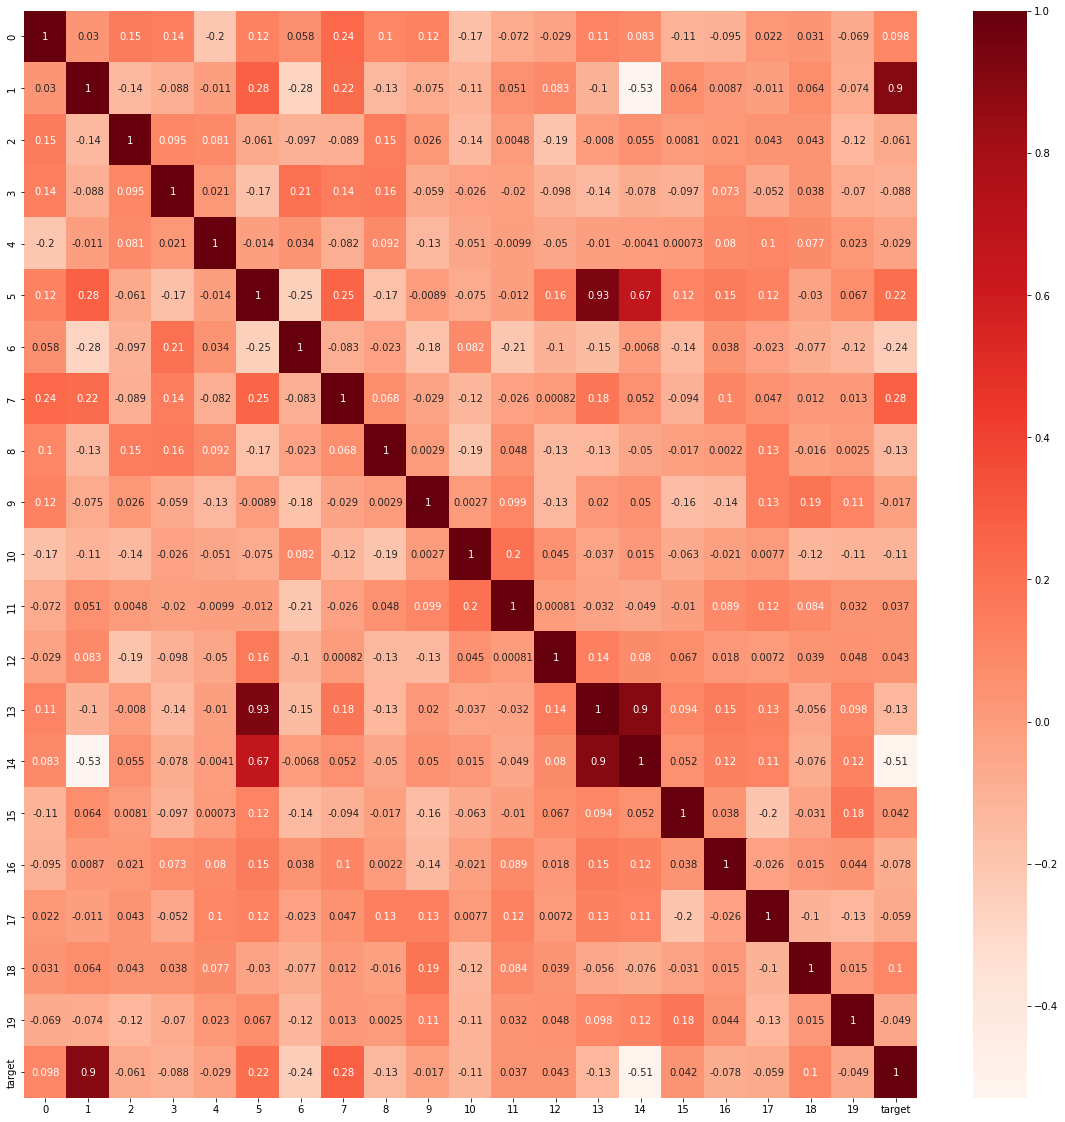

In [9]:
plt.rcParams['figure.figsize'] = 20,20

sns.heatmap(data.corr(), cmap="Reds", annot=True)

Видим сильную корреляцию между признаками 5-13, 5-14, 1-14, 13-14

Признаки 1, 14 имеют сильную корреляцию с целевой перемнной, их удалять не будем

Удалим признаки 5, 13


In [14]:
X_tmp= X.drop([5,13], axis=1)


Проверим качество модели

In [208]:
cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean()

0.9

Удалим признаки с низкой вариантивностью
threshold подобран наугад

In [209]:
selector = VarianceThreshold(threshold=3.6)

In [210]:
X_tmp = selector.fit_transform(X)

In [211]:
np.shape(X_tmp)

(100, 15)

Признаки, оставленные после преобразования

In [212]:
selector.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x4', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12',
       'x13', 'x14', 'x16', 'x18', 'x19'], dtype=object)

In [213]:
X_tmp = pd.DataFrame(X_tmp, columns=selector.get_feature_names_out())

In [214]:
X_tmp.head()

,x0,x1,x2,x4,x7,x8,x9,x10,x11,x12,x13,x14,x16,x18,x19
0,1.213097,1.633915,2.102642,-0.919435,0.100634,3.410967,2.835348,-1.474579,0.619634,1.556348,-2.249574,-2.567865,0.189992,0.329330,-1.535607
1,-6.107529,1.842324,-2.916649,1.224465,0.797197,1.489769,-1.998853,0.959705,-1.922527,1.156929,-2.140415,-2.575481,0.988683,-3.105398,-0.893398
2,1.212808,1.361291,2.042496,1.345239,1.198426,4.857754,1.350908,4.587435,-0.429308,-2.039040,-2.408805,-2.571180,1.049501,-1.660022,-0.071980
3,3.233899,-3.031896,4.898737,0.485339,2.815080,0.403660,-0.869913,1.005482,-2.439489,0.218805,-0.049763,1.353217,-1.091548,3.117611,-1.400797
4,-1.656295,-3.138347,3.525218,2.255503,-1.964322,0.100586,1.116528,-0.221457,1.361958,-0.949180,-1.081096,0.569148,-0.715028,-0.858772,-0.710827


Оценим точность модели на отобранных признаках

In [215]:
cross_val_score(LogisticRegression(), X_tmp, y, scoring='accuracy').mean()

0.9099999999999999

### Отбор признаков на основе дисперсионного анализа

In [90]:
selector = SelectKBest(k=5)
X_tmp = selector.fit_transform(X, y)

In [92]:
X_tmp = pd.DataFrame(X_tmp, columns=selector.get_feature_names_out())

In [93]:
X_tmp.head()

,x1,x5,x6,x7,x14
0,1.633915,-1.177928,1.300646,0.100634,-2.567865
1,1.842324,-1.027143,-0.384007,0.797197,-2.575481
2,1.361291,-1.387665,-2.940474,1.198426,-2.571180
3,-3.031896,-1.024519,0.258203,2.815080,1.353217
4,-3.138347,-1.842972,-0.894616,-1.964322,0.569148


Оценим точность модели

In [94]:
cross_val_score(LogisticRegression(), X_tmp, y, scoring='accuracy').mean()

0.95

### Отбор признаков с использованием моделей

In [117]:
selector = SelectFromModel(estimator=LogisticRegression(solver='saga', penalty='l1')).fit(X, y)
X_tmp = selector.transform(X)

In [118]:
X_tmp = pd.DataFrame(X_tmp, columns=selector.get_feature_names_out())
X_tmp.head()

,x0,x1,x3,x5,x7,x8,x9,x12,x14,x15,x16,x18
0,1.213097,1.633915,3.314249,-1.177928,0.100634,3.410967,2.835348,1.556348,-2.567865,0.161502,0.189992,0.329330
1,-6.107529,1.842324,0.481011,-1.027143,0.797197,1.489769,-1.998853,1.156929,-2.575481,-2.988388,0.988683,-3.105398
2,1.212808,1.361291,2.991770,-1.387665,1.198426,4.857754,1.350908,-2.039040,-2.571180,-0.954248,1.049501,-1.660022
3,3.233899,-3.031896,1.246724,-1.024519,2.815080,0.403660,-0.869913,0.218805,1.353217,-0.397676,-1.091548,3.117611
4,-1.656295,-3.138347,-2.447759,-1.842972,-1.964322,0.100586,1.116528,-0.949180,0.569148,1.045310,-0.715028,-0.858772


Оценим точность модели

In [119]:
cross_val_score(LogisticRegression(), X_tmp, y, scoring='accuracy').mean()

0.9099999999999999

Отбор признаков на основе RandomForest

In [120]:
selector = RandomForestClassifier(random_state=0).fit(X, y)

In [139]:
feature_importances = pd.Series(selector.feature_importances_, index=X.columns)

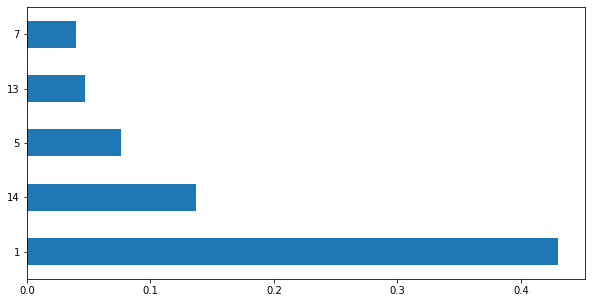

In [141]:
plt.rcParams['figure.figsize'] = 10,5
feature_importances.nlargest(5).plot(kind='barh')

Выберем 5 максимально значимых признаков и проверим точность модели с использованием их

In [193]:
X_tmp = X.drop(X.columns.difference(feature_importances.nlargest(5).index), axis=1)

In [194]:
X_tmp.head()

,1,5,7,13,14
0,1.633915,-1.177928,0.100634,-2.249574,-2.567865
1,1.842324,-1.027143,0.797197,-2.140415,-2.575481
2,1.361291,-1.387665,1.198426,-2.408805,-2.571180
3,-3.031896,-1.024519,2.815080,-0.049763,1.353217
4,-3.138347,-1.842972,-1.964322,-1.081096,0.569148


Оценим качество модели

In [195]:
cross_val_score(LogisticRegression(), X_tmp, y, scoring='accuracy').mean()

0.95

Учитывая сильную корреляцию признака 1 с целевой переменной и максимальную значимость его по "мнению" RandomForest можем попробовать построить модель, используя только этот признак

In [200]:
X_tmp = X.drop(X.columns.difference(feature_importances.nlargest(1).index), axis=1)

In [201]:
X_tmp.head()

,1
0,1.633915
1,1.842324
2,1.361291
3,-3.031896
4,-3.138347


In [202]:
cross_val_score(LogisticRegression(), X_tmp, y, scoring='accuracy').mean()

0.96

В итоге мы получили максимальный результат, используя только 1 признак

### Перебор признаков

In [204]:
selector = SequentialFeatureSelector(RandomForestClassifier(random_state=0))
selector.fit(X, y)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=0))

In [205]:
X_tmp = selector.transform(X)

In [206]:
X_tmp = pd.DataFrame(X_tmp, columns=selector.get_feature_names_out())
X_tmp.head()

,x0,x1,x2,x3,x4,x5,x6,x8,x15,x17
0,1.213097,1.633915,2.102642,3.314249,-0.919435,-1.177928,1.300646,3.410967,0.161502,-0.729076
1,-6.107529,1.842324,-2.916649,0.481011,1.224465,-1.027143,-0.384007,1.489769,-2.988388,0.408755
2,1.212808,1.361291,2.042496,2.991770,1.345239,-1.387665,-2.940474,4.857754,-0.954248,2.074078
3,3.233899,-3.031896,4.898737,1.246724,0.485339,-1.024519,0.258203,0.403660,-0.397676,-0.406789
4,-1.656295,-3.138347,3.525218,-2.447759,2.255503,-1.842972,-0.894616,0.100586,1.045310,0.197884


In [207]:
cross_val_score(LogisticRegression(), X_tmp, y, scoring='accuracy').mean()

0.93

## Выводы
| Метод отбора признаков                                                    | score |
|---------------------------------------------------------------------------|-------|
| Baseline                                                                  | 0.9   |
| Удалены признаки с высокой корреляцией                                    | 0.9   |
| VarianceThreshold(threshold=3.6)                                          | 0.91  |
| SelectKBest(k=5)                                                          | 0.95  |
| SelectFromModel(estimator=LogisticRegression(solver='saga', penalty='l1') | 0.91  |
| RandomForestClassifier, nlargest(5)                                       | 0.95  |
| RandomForestClassifier, nlargest(1)                                       | 0.96  |
| SequentialFeatureSelector(RandomForestClassifier())                       | 0.93  |

Методы отбора признаков существенно улучшают качество модели.
По счастливому стечению обстоятельств максимальный результат получен всего на одном признаке с высокой корреляцией с целевой переменной.